C:\Users\sharada luitel\Desktop\DLLs\annaconda\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" siz
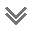

In [1]:
from bs4 import BeautifulSoup
import requests
url = BeautifulSoup('https://www.worldometers.info/coronavirus/', 'html.parser')
soup = requests.get(url)
soup = BeautifulSoup(soup.text, "lxml")
soup


In [2]:
table_code = soup.table
table_code

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [3]:
final_data = []
tr_tags = table_code.find_all('tr')
for i in tr_tags:
    x = i.text.split('\n')
    if x[1] != "":
        final_data.append(x[1:-1])
    
# final_data

In [4]:
import csv
file = open('covidData.csv','w')
x = csv.writer(file)
x.writerows(final_data)

In [5]:
import pandas as pd
df = pd.read_csv('covidData.csv', encoding = 'latin1')
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/,1M pop,Unnamed: 15,Population,Continent,1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,1,USA,"106,767,388",NaN,"1,162,427",NaN,"104,710,726",NaN,"894,235","1,229",...,"1,178,783,869","3,520,804","334,805,269",North America,NaN,32880,NaN,NaN,"2,671",NaN
1,2,India,"44,969,630",NaN,"531,680",NaN,"44,410,738",NaN,"27,212",NaN,...,"927,691,306","659,513","1,406,631,776",Asia,NaN,"312,6462",NaN,NaN,19,NaN
2,3,France,"40,017,889",NaN,"166,811",NaN,"39,735,197",NaN,"115,881",869,...,"271,490,188","4,139,547","65,584,518",Europe,NaN,23930,NaN,NaN,"1,767",NaN
3,4,Germany,"38,411,062",NaN,"173,375",NaN,"38,206,500",+400,"31,187",NaN,...,"122,332,384","1,458,359","83,883,596",Europe,NaN,24841,NaN,NaN,372,NaN
4,5,Brazil,"37,487,971",NaN,"701,833",NaN,"36,249,161",NaN,"536,977",NaN,...,"63,776,166","296,146","215,353,593",South America,NaN,63073,NaN,NaN,"2,493",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,141,Belize,"70,782",NaN,688,NaN,"70,085",NaN,9,6,...,"576,016","1,397,453","412,190",North America,NaN,65991,NaN,NaN,22,NaN
141,142,Fiji,"68,921",NaN,883,NaN,"67,029",NaN,"1,009",NaN,...,"670,903","737,689","909,466",Australia/Oceania,NaN,"131,0301",NaN,NaN,"1,109",NaN
142,143,Madagascar,"68,236",NaN,"1,424",NaN,"66,786",NaN,26,NaN,...,"530,005","18,164","29,178,077",Africa,NaN,"42820,49055",NaN,NaN,0.9,NaN
143,144,Sudan,"63,993",NaN,"5,046",NaN,"58,640",NaN,307,NaN,...,"562,941","12,240","45,992,020",Africa,NaN,"7199,11582",NaN,NaN,7,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 22 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   #                                                     145 non-null    int64  
 1   Country,Other                                         145 non-null    object 
 2   TotalCases                                            145 non-null    object 
 3   NewCases                                              2 non-null      float64
 4   TotalDeaths                                           145 non-null    object 
 5   NewDeaths                                             0 non-null      float64
 6   TotalRecovered                                        134 non-null    object 
 7   NewRecovered                                          12 non-null     object 
 8   ActiveCases                                           134 no

In [7]:
Country = list(df['Country,Other'][0:5])
TotalCases = list(map(lambda x:int(x.replace(',','')), list(df['TotalCases'][0:5])))
TotalRecovered = list(map(lambda x:int(x.replace(',','')), list(df['TotalRecovered'][0:5])))

In [1]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=Country, y=TotalCases)])
fig.show()

NameError: name 'Country' is not defined

In [9]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='TotalCases', x=Country, y=TotalCases),
    go.Bar(name='TotalRecovered', x=Country, y=TotalRecovered)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [2]:
pwd


'C:\\Users\\ACER'